 ## 대표 색상(H변경) 관련 가설검증
 
    최초 작성일 : 2020/03/23
    작성자 : 조예슬 
 
    < 작성 내용 >
    
        설문지(2) 사용 3번 문항
    
        - 설문조사 결과 그래프로 시각화
        
        - 성별에 따른 색상(FixedHue, harmony) 인식 차이
        
        - 연령에 따른 색상(FixedHue, harmony) 인식 차이
        
        - 패션 관심도에 따른 색상(FixedHue, harmony) 인식 차이
        
        - definition + need 묶어서 색상(FixedHue, harmony) 인식 차이 

        - Sex + Age 묶어서 색상(FixedHue, harmony) 인식 차이

# 색상변경, harmony

### 설문조사 결과를 토대로 대표 색상 설정

In [1]:
# 데이터 불러오기

hChanged_harmony <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/hChanged_harmony.csv")
str(hChanged_harmony)
head(hChanged_harmony)

'data.frame':	576 obs. of  4 variables:
 $ X     : int  0 1 2 3 4 5 6 7 8 9 ...
 $ select: Factor w/ 5 levels "144","216","288",..: 5 3 3 3 1 5 5 1 1 3 ...
 $ class : Factor w/ 6 levels "comp","doubleness1",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ cnt   : int  1 1 1 1 1 1 1 1 1 1 ...


X,select,class,cnt
0,original,comp,1
1,288,comp,1
2,288,comp,1
3,288,comp,1
4,144,comp,1
5,original,comp,1


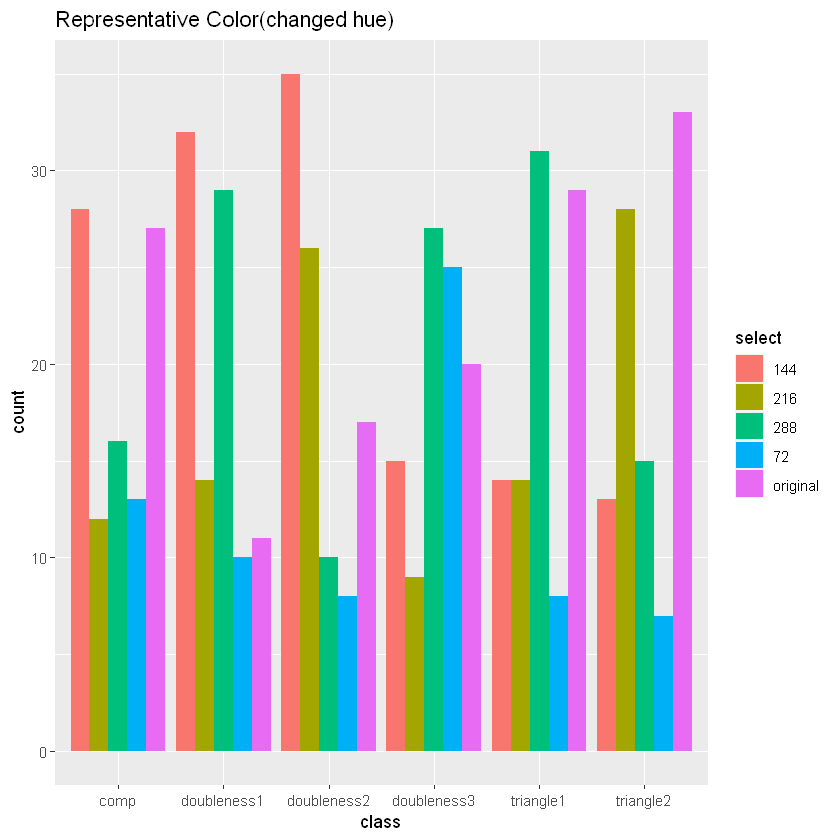

In [2]:
# 그래프로 상태 먼저 확인

# install.packages("ggplot2")
library("ggplot2")

# 각 샘플마다 나눠서 보기
ggplot(hChanged_harmony, aes(class, fill=select)) + geom_bar(position="dodge") + labs(title="Representative Color(changed hue)")
# 음.. 상당히 일관성이 없는것같다ㅋㅋㅋㅋ

In [6]:
# 전체결과보기 위한 dataframe 새로 만들기
t_72 <- with(hChanged_harmony, sum(cnt[select=="72"]))
t_144 <- with(hChanged_harmony, sum(cnt[select=="144"]))
t_origin <- with(hChanged_harmony, sum(cnt[select=="original"]))
t_216 <- with(hChanged_harmony, sum(cnt[select=="216"]))
t_288 <- with(hChanged_harmony, sum(cnt[select=="288"]))

# column 만들기
total <- c(t_72, t_144, t_origin, t_216, t_288)

# dataframe 만들기
df_hChanged_harmony <- data.frame(total)
rownames(df_hChanged_harmony) <- c("72", "144", "original", "216", "288")
library(tibble)
df_hChanged_harmony2 <- rownames_to_column(df_hChanged_harmony, var="select")

df_hChanged_harmony2

select,total
72,71
144,137
original,137
216,103
288,128


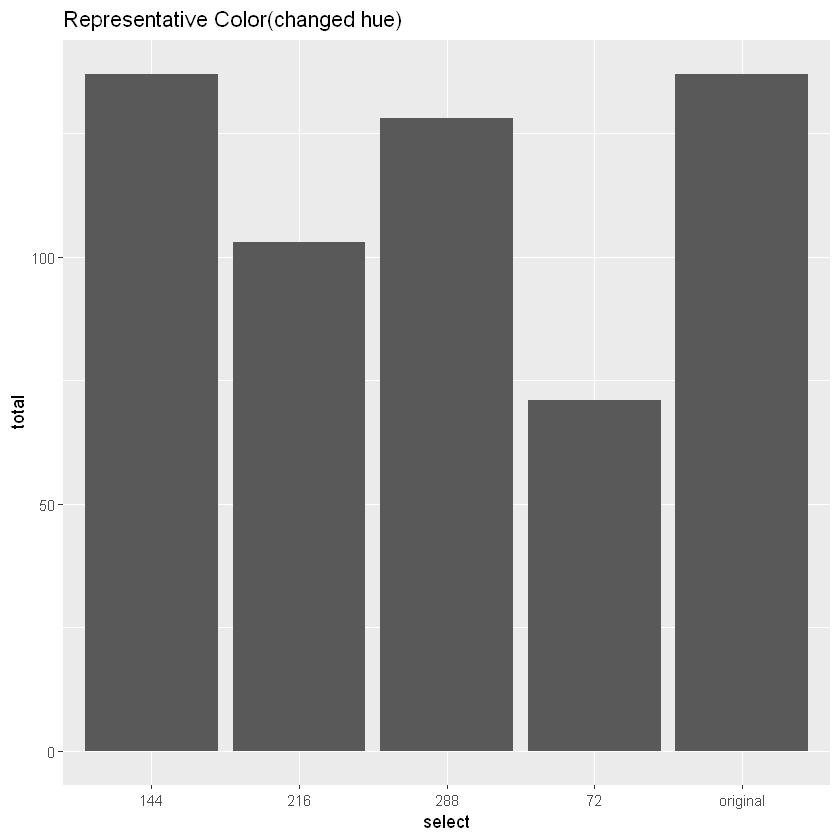

In [7]:
# 전체 결과 그래프로 확인

ggplot(df_hChanged_harmony2, aes(x=select, y=total)) + geom_bar(stat="identity") + labs(title="Representative Color(changed hue)")

    144º, original이 동일하게 같은 값을 선택 받음
    논문에 의하면 original이 personal color이므로 
    original로 진행
    
    설문조사 결과를 토대로 
    대표색상(색상변경,harmony)은 "original" 값으로 설정
        
    그렇기에 앞으로 분석 방향은
    대표색상 "original"로 설정하여 모든것을 진행할 것

# 전체

### 성별에 따른 대표 색상(색상변경, harmony) 인식 차이 

    귀무가설 : 성별에 따라 대표 색상(색상변경, harmony) 인식 차이가 없다
    대립가설 : 성별에 따라 대표 색상(색상변경, harmony) 인식 차이가 있다
    
    - 대표 색상(색상변경, harmony) : original
    - chisq.test 사용

In [8]:
# 데이터 불러오기

S_hCH_cnt <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/S_hCH_cnt2.csv")
str(S_hCH_cnt)
head(S_hCH_cnt)

'data.frame':	576 obs. of  4 variables:
 $ X     : int  0 1 2 3 4 5 6 7 8 9 ...
 $ sex   : Factor w/ 2 levels "Female","Male": 1 2 1 2 1 1 1 1 1 1 ...
 $ select: Factor w/ 5 levels "144","216","288",..: 5 3 3 3 1 5 5 1 1 3 ...
 $ cnt   : int  1 1 1 1 1 1 1 1 1 1 ...


X,sex,select,cnt
0,Female,original,1
1,Male,288,1
2,Female,288,1
3,Male,288,1
4,Female,144,1
5,Female,original,1


In [11]:
## 데이터프레임 재생성

# 남
Male_T <- with(S_hCH_cnt, sum(cnt[sex=="Male" & select == "original"]))
Male_F <- with(S_hCH_cnt, sum(cnt[sex=="Male" & select != "original"]))

# 여
Female_T <- with(S_hCH_cnt, sum(cnt[sex=="Female" & select == "original"]))
Female_F <- with(S_hCH_cnt, sum(cnt[sex=="Female" & select != "original"]))

# column 생성
Male <- c(Male_T, Male_F)
Female <- c(Female_T, Female_F)

# dataframe 만들기
df_S_hCH_cnt <- data.frame(Male, Female)
df_S_hCH_cnt <-t(df_S_hCH_cnt)
colnames(df_S_hCH_cnt) <- c("True", "False")


## 행, 열 각각의 합계 알아보기
addmargins(df_S_hCH_cnt)


## 카이제곱
chisq.test(df_S_hCH_cnt)
# p-value = 0.3547
# 0.05보다 큰 값을 가지므로 귀무가설 성립
# 성별에 따라 안면부위 인식 차이가 없음을 알 수 있다

,True,False,Sum
Male,55,155,210
Female,82,284,366
Sum,137,439,576



	Pearson's Chi-squared test with Yates' continuity correction

data:  df_S_hCH_cnt
X-squared = 0.85665, df = 1, p-value = 0.3547


### 연령에 따른 대표 색상(색상변경, harmony) 인식 차이 

    귀무가설 : 연령에 따라 대표 색상(색상변경, harmony) 인식 차이가 없다
    대립가설 : 연령에 따라 대표 색상(색상변경, harmony) 인식 차이가 있다
    
    - 대표 색상(색상변경, harmony) : original
    - chisq.test 사용

In [13]:
# 데이터 불러오기

A_hCH_cnt <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/A_hCH_cnt2.csv")
str(A_hCH_cnt)
head(A_hCH_cnt)

'data.frame':	576 obs. of  4 variables:
 $ X     : int  0 1 2 3 4 5 6 7 8 9 ...
 $ age   : int  20 20 20 20 20 30 30 20 30 20 ...
 $ select: Factor w/ 5 levels "144","216","288",..: 5 3 3 3 1 5 5 1 1 3 ...
 $ cnt   : int  1 1 1 1 1 1 1 1 1 1 ...


X,age,select,cnt
0,20,original,1
1,20,288,1
2,20,288,1
3,20,288,1
4,20,144,1
5,30,original,1


In [15]:
## 데이터프레임 재생성

teens_T <- with(A_hCH_cnt, sum(cnt[age == "10" & select == "original"]))
teens_F <- with(A_hCH_cnt, sum(cnt[age == "10" & select != "original"]))

twenty_T <- with(A_hCH_cnt, sum(cnt[age == "20" & select == "original"]))
twenty_F <- with(A_hCH_cnt, sum(cnt[age == "20" & select != "original"]))

thirty_T <- with(A_hCH_cnt, sum(cnt[age == "30" & select == "original"]))
thirty_F <- with(A_hCH_cnt, sum(cnt[age == "30" & select != "original"]))

forty_T <- with(A_hCH_cnt, sum(cnt[age == "40" & select == "original"]))
forty_F <- with(A_hCH_cnt, sum(cnt[age == "40" & select != "original"]))

fifty_T <- with(A_hCH_cnt, sum(cnt[age == "50" & select == "original"]))
fifty_F <- with(A_hCH_cnt, sum(cnt[age == "50" & select != "original"]))

teens <- c(teens_T, teens_F)
twenty <- c(twenty_T, twenty_F)
thirty <- c(thirty_T, thirty_F)
forty <- c(forty_T, forty_F)
fifty <- c(fifty_T, fifty_F)
             
df_A_hCH_cnt <- data.frame(teens, twenty, thirty, forty, fifty)
df_A_hCH_cnt <- t(df_A_hCH_cnt)
colnames(df_A_hCH_cnt) <- c("True", "False")
# df_A_hCB_cnt


## 행, 열 각각의 합계 알아보기

addmargins(df_A_hCH_cnt)
# 합계값이 동일하지 않으므로 chisq.test 사용


## 카이제곱

chisq.test(df_A_hCH_cnt)
# p-value = 0.3036
# 0.05보다 큰 값을 가지므로 귀무가설 성립
# 연령에 따라 색상(hueBright) 인식 차이가 없음을 알 수 있다
# but 기대도수가 낮은 셀이 전체의 25% 이상 존재하므로 
# Fisher's exact test 사용해야한다!!


## Fisher's exact test

fisher.test(df_A_hCH_cnt)
# p-value = 0.3269
# 0.05보다 큰 값을 가지므로 귀무가설 성립
# 연령에 따라 색상(hueBright) 인식 차이가 없음을 알 수 있다

,True,False,Sum
teens,11,31,42
twenty,79,257,336
thirty,36,90,126
forty,2,16,18
fifty,9,45,54
Sum,137,439,576


Warning message in chisq.test(df_A_hCH_cnt):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  df_A_hCH_cnt
X-squared = 4.8447, df = 4, p-value = 0.3036



	Fisher's Exact Test for Count Data

data:  df_A_hCH_cnt
p-value = 0.3269
alternative hypothesis: two.sided


### 패션 관심도에 따른 대표 색상(색상변경, harmony) 인식 차이 

    귀무가설 : 패션 관심도에 따라 대표 색상(색상변경, harmony) 인식 차이가 없다
    대립가설 : 패션 관심도에 따라 대표 색상(색상변경, harmony) 인식 차이가 있다
    
    - 대표 색상(색상변경, harmony) : original
    - chisq.test 사용

In [16]:
# 데이터 불러오기

I_hCH_cnt <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/I_hCH_cnt.csv")
str(I_hCH_cnt)
head(I_hCH_cnt)

'data.frame':	576 obs. of  4 variables:
 $ X       : int  0 1 2 3 4 5 6 7 8 9 ...
 $ interest: int  3 5 5 3 3 4 3 3 5 1 ...
 $ select  : Factor w/ 5 levels "144","216","288",..: 5 3 3 3 1 5 5 1 1 3 ...
 $ cnt     : int  1 1 1 1 1 1 1 1 1 1 ...


X,interest,select,cnt
0,3,original,1
1,5,288,1
2,5,288,1
3,3,288,1
4,3,144,1
5,4,original,1


In [19]:
## 데이터프레임 재생성

I_True <- c()
I_False <- c()

for(i in seq(1,5, by=1)){
    True <- with(I_hCH_cnt, sum(cnt[interest==i & select =="original"]))
    I_True[[(i)]] <- True

    False <- with(I_hCH_cnt, sum(cnt[interest==i & select != "original"]))

    I_False[[i]] <- False
       
    interest_TF <- data.frame(True=I_True, False=I_False)
}

interest_TF

# 카이제곱

chisq.test(interest_TF)
# p-value = 0.4844
# 0.05보다 큰 값을 가지므로 귀무가설 성립
# 패션 관심도에 따른 색상 인식차이 없다

True,False
14,40
15,51
43,167
43,107
22,74



	Pearson's Chi-squared test

data:  interest_TF
X-squared = 3.4574, df = 4, p-value = 0.4844


### Defintion, Need 에 따른 대표 색상(색상변경, harmony) 인식 차이 

    귀무가설 : definition + need 에 따라 대표 색상(색상변경, harmony) 인식 차이가 없다
    대립가설 : definition + need 에 따라 대표 색상(색상변경, harmony) 인식 차이가 있다
    
    definition + need 묶은 방법
    : bright + bright
    : bright + harmony
    : harmony + bright
    : harmony + harmony
    
    - 대표 색상(색상변경, harmony) : original
    - chisq.test 사용

In [20]:
# 데이터 불러오기

DN_hCH_cnt <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/DN_hCH_cnt.csv")
str(DN_hCH_cnt)
head(DN_hCH_cnt)

'data.frame':	576 obs. of  5 variables:
 $ X         : int  0 1 2 3 4 5 6 7 8 9 ...
 $ definition: Factor w/ 2 levels "bright","harmony": 1 2 1 1 1 2 2 1 2 2 ...
 $ need      : Factor w/ 2 levels "bright","harmony": 1 2 1 2 1 2 1 1 1 2 ...
 $ select    : Factor w/ 5 levels "144","216","288",..: 5 3 3 3 1 5 5 1 1 3 ...
 $ cnt       : int  1 1 1 1 1 1 1 1 1 1 ...


X,definition,need,select,cnt
0,bright,bright,original,1
1,harmony,harmony,288,1
2,bright,bright,288,1
3,bright,harmony,288,1
4,bright,bright,144,1
5,harmony,harmony,original,1


In [25]:
## 데이터프레임 재생성

# bright + bright
BB_T <- with(DN_hCH_cnt, sum(cnt[definition == "bright" & need == "bright" & select == "original"]))
BB_F <- with(DN_hCH_cnt, sum(cnt[definition == "bright" & need == "bright" & select != "original"]))
             
# bright + harmony
BH_T <- with(DN_hCH_cnt, sum(cnt[definition == "bright" & need == "harmony" & select == "original"]))
BH_F <- with(DN_hCH_cnt, sum(cnt[definition == "bright" & need == "harmony" & select != "original"]))

# harmony + bright
HB_T <- with(DN_hCH_cnt, sum(cnt[definition == "harmony" & need == "bright" & select == "original"]))
HB_F <- with(DN_hCH_cnt, sum(cnt[definition == "harmony" & need == "bright" & select != "original"]))

# harmony + harmony
HH_T <- with(DN_hCH_cnt, sum(cnt[definition == "harmony" & need == "harmony" & select == "original"]))
HH_F <- with(DN_hCH_cnt, sum(cnt[definition == "harmony" & need == "harmony" & select != "original"]))

BB <- c(BB_T, BB_F)
BH <- c(BH_T, BH_F)
HB <- c(HB_T, HB_F)
HH <- c(HH_T, HH_F)

df_DN_hCH_cnt <- data.frame(BB, BH, HB, HH)
df_DN_hCH_cnt <- t(df_DN_hCH_cnt)
colnames(df_DN_hCH_cnt) <- c("True", "False")
df_DN_hCH_cnt

## 행, 열 각각의 합계 알아보기
addmargins(df_DN_hCH_cnt)
# 합계값이 동일하지 않으므로 chisq.test 사용

## 카이제곱
chisq.test(df_DN_hCH_cnt)
# p-value = 0.2469
# but 기대도수가 낮은 셀이 전체의 25% 이상 존재하므로 
# Fisher's exact test 사용해야한다!!

## Fisher's exact test

fisher.test(df_DN_hCH_cnt)
# p-value = 0.2651
# 0.05보다 큰 값을 가지므로 귀무가설 성립
# 패션 관심도에 따른 색상 인식차이 없다

,True,False
BB,21,93
BH,3,15
HB,30,72
HH,83,259


,True,False,Sum
BB,21,93,114
BH,3,15,18
HB,30,72,102
HH,83,259,342
Sum,137,439,576


Warning message in chisq.test(df_DN_hCH_cnt):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  df_DN_hCH_cnt
X-squared = 4.1382, df = 3, p-value = 0.2469



	Fisher's Exact Test for Count Data

data:  df_DN_hCH_cnt
p-value = 0.2651
alternative hypothesis: two.sided


#### Defintion, Need 에 따른 대표 색상(색상변경, harmony) 선택 분석 

In [26]:
df_DN_hCH_cnt

,True,False
BB,21,93
BH,3,15
HB,30,72
HH,83,259


### 결과 해석 

     + BB, BH, HB, HH 에 따른 인식 차이 분석

     HH 선택이  제일 많음 

     선택 개수 : BB 114  BH 18  HB 102  HH 342

     맞춘 확률 : BB 18.4%   BH 16.7%   HB 29.4%   HH 24.3%

### Sex, Age 에 따른 대표 색상(색상 변경, harmony) 인식 차이 

    귀무가설 : sex + age 에 따라 대표 색상(색상변경, harmony) 인식 차이가 없다
    대립가설 : sex + age 에 따라 대표 색상(색상변경, harmony) 인식 차이가 있다
    
    - 대표 색상(색상변경, harmony) : original
    - chisq.test 사용

In [32]:
# 데이터 불러오기

SA_hCH_cnt <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/FinalProject/Statistical Analysis/SA_hCH_cnt.csv")
str(SA_hCH_cnt)
head(SA_hCH_cnt)

'data.frame':	576 obs. of  5 variables:
 $ X        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ sex      : Factor w/ 2 levels "Female","Male": 1 2 1 2 1 1 1 1 1 1 ...
 $ age_class: int  20 20 20 20 20 30 30 20 30 20 ...
 $ select   : Factor w/ 5 levels "144","216","288",..: 5 3 3 3 1 5 5 1 1 3 ...
 $ cnt      : int  1 1 1 1 1 1 1 1 1 1 ...


X,sex,age_class,select,cnt
0,Female,20,original,1
1,Male,20,288,1
2,Female,20,288,1
3,Male,20,288,1
4,Female,20,144,1
5,Female,30,original,1


In [35]:
## 데이터프레임 재생성

# Female + 10 
F10_T <- with(SA_hCH_cnt, sum(cnt[sex == "Female" & age_class == "10" & select == "original"]))
F10_F <- with(SA_hCH_cnt, sum(cnt[sex == "Female" & age_class == "10" & select != "original"]))

# Female + 20 
F20_T <- with(SA_hCH_cnt, sum(cnt[sex == "Female" & age_class == "20" & select == "original"]))
F20_F <- with(SA_hCH_cnt, sum(cnt[sex == "Female" & age_class == "20" & select != "original"]))

# Female + 30 
F30_T <- with(SA_hCH_cnt, sum(cnt[sex == "Female" & age_class == "30" & select == "original"]))
F30_F <- with(SA_hCH_cnt, sum(cnt[sex == "Female" & age_class == "30" & select != "original"]))

# Female + 40 
F40_T <- with(SA_hCH_cnt, sum(cnt[sex == "Female" & age_class == "40" & select == "original"]))
F40_F <- with(SA_hCH_cnt, sum(cnt[sex == "Female" & age_class == "40" & select != "original"]))

# Female + 50 
F50_T <- with(SA_hCH_cnt, sum(cnt[sex == "Female" & age_class == "50" & select == "original"]))
F50_F <- with(SA_hCH_cnt, sum(cnt[sex == "Female" & age_class == "50" & select != "original"]))

# Male + 10 
M10_T <- with(SA_hCH_cnt, sum(cnt[sex == "Male" & age_class == "10" & select == "original"]))
M10_F <- with(SA_hCH_cnt, sum(cnt[sex == "Male" & age_class == "10" & select != "original"]))

# Male + 20 
M20_T <- with(SA_hCH_cnt, sum(cnt[sex == "Male" & age_class == "20" & select == "original"]))
M20_F <- with(SA_hCH_cnt, sum(cnt[sex == "Male" & age_class == "20" & select != "original"]))

# Male + 30 
M30_T <- with(SA_hCH_cnt, sum(cnt[sex == "Male" & age_class == "30" & select == "original"]))
M30_F <- with(SA_hCH_cnt, sum(cnt[sex == "Male" & age_class == "30" & select != "original"]))

# Male + 40 
M40_T <- with(SA_hCH_cnt, sum(cnt[sex == "Male" & age_class == "40" & select == "original"]))
M40_F <- with(SA_hCH_cnt, sum(cnt[sex == "Male" & age_class == "40" & select != "original"]))

# Male + 50 
M50_T <- with(SA_hCH_cnt, sum(cnt[sex == "Male" & age_class == "50" & select == "original"]))
M50_F <- with(SA_hCH_cnt, sum(cnt[sex == "Male" & age_class == "50" & select != "original"]))


F10 <- c(F10_T, F10_F)
F20 <- c(F20_T, F20_F)
F30 <- c(F30_T, F30_F)
F40 <- c(F40_T, F40_F)
F50 <- c(F50_T, F50_F)

M10 <- c(M10_T, M10_F)
M20 <- c(M20_T, M20_F)
M30 <- c(M30_T, M30_F)
M40 <- c(M40_T, M40_F)
M50 <- c(M50_T, M50_F)

df_SA_hCH_cnt <- data.frame(F10, F20, F30, F40, F50, M10, M20, M30, M40, M50)
df_SA_hCH_cnt <- t(df_SA_hCH_cnt)
colnames(df_SA_hCH_cnt) <- c("True", "False")

## 행, 열 각각의 합계 알아보기
addmargins(df_SA_hCH_cnt)
# 합계값이 동일하지 않으므로 chisq.test 사용

## 카이제곱
chisq.test(df_SA_hCH_cnt)
# p-value = 0.2862
# but 기대도수가 낮은 셀이 전체의 25% 이상 존재하므로 
# Fisher's exact test 사용해야한다!!


## Fisher's exact test
fisher.test(df_SA_hCH_cnt, simulate.p.value=TRUE)
# p-value = 0.3518
# 0.05보다 큰 값을 가지므로 귀무가설 성립

,True,False,Sum
F10,10,26,36
F20,37,155,192
F30,29,67,96
F40,0,6,6
F50,6,30,36
M10,1,5,6
M20,42,102,144
M30,7,23,30
M40,2,10,12
M50,3,15,18


Warning message in chisq.test(df_SA_hCH_cnt):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  df_SA_hCH_cnt
X-squared = 10.849, df = 9, p-value = 0.2862



	Fisher's Exact Test for Count Data with simulated p-value (based on
	2000 replicates)

data:  df_SA_hCH_cnt
p-value = 0.3678
alternative hypothesis: two.sided


#### Sex, Age 에 따른 대표 색상(색상변경, harmony) 선택 분석 

In [36]:
df_SA_hCH_cnt

,True,False
F10,10,26
F20,37,155
F30,29,67
F40,0,6
F50,6,30
M10,1,5
M20,42,102
M30,7,23
M40,2,10
M50,3,15


### 결과 해석 

     + Sex, Age 에 따른 인식 차이 분석

     정답 비율 
     F10 27.8%  F20 19.3%  F30 30.2%  F40  0.0%  F50  16.7% 
     M10 16.7%  M20 29.2%  M30 23.3%  M40 16.7%  M50  16.7%
     
     앞의 분석 결과 
     성별에 따른 인식 차이가 없었고, 
     연령에 따른 인식 차이가 없었다.
     
     정답 확률 : 30대여자 > 20대남자 > 10대여자